### 1. Import

In [1]:
# import libs
import glob
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
from tqdm import tqdm

### 2. Data preparation

In [2]:
activity_folders = ['idle', 'running', 'walking', 'stairs']
path_data = 'data'

Read the files from the directory

In [3]:
def get_files(path_to, folder):
    custom_path = os.path.join(path_to, activity_folders[folder], '*.csv')
    filenames = glob.glob(custom_path)
    return filenames

In [4]:
idle_filenames = get_files(path_data, 0)
running_filenames = get_files(path_data, 1)
walking_filenames = get_files(path_data, 2)
stairs_filenames = get_files(path_data, 3)

count how many data files

In [5]:
print("There are:\n {0} idle {4}\n {1} running {4}\n {2} stairs {4}\n {3} walking {4}\n ".format(len(idle_filenames), len(running_filenames), len(stairs_filenames), len(walking_filenames), 'files'))

There are:
 1039 idle files
 3408 running files
 165 stairs files
 1850 walking files
 


Function to get files data and add the data to dataframe

In [6]:
def get_file_data(filenames):
    regex = re.compile('^[a-zA-Z]*')
    li = []
    for f in filenames:
        full_name = os.path.basename(f)
        df = pd.read_csv(f, index_col=None, header=0)

        # calculate mean and standard deviation value for coordinates in each file with activity
        ndf = df.copy().to_numpy()

        column_means = ndf.mean(axis=0)
        df['X_mean'] = column_means[0]
        df['Y_mean'] = column_means[1]
        df['Z_mean'] = column_means[2]

        column_stdev = ndf.std(axis=0)
        df['X_stdev'] = column_stdev[0]
        df['Y_stdev'] = column_stdev[1]
        df['Z_stdev'] = column_stdev[2]

        # adding label and source filename to the DF
        new_name = regex.match(full_name).group()

        # adding label to the DF
        df['label'] = new_name
        df['filename'] = full_name

        li.append(df)
    df = pd.concat(li, axis=0, ignore_index=True)
    return  df

In [7]:
dataframes = []

**Get idle accelerometer data**

In [8]:
for i in tqdm(range(25), desc='Progress'):
    df_idle_data = get_file_data(idle_filenames)
df_idle_data.head()
dataframes.append(df_idle_data)

Progress: 100%|██████████| 50/50 [07:43<00:00,  9.28s/it]


**Get running accelerometer data**

In [9]:
for i in tqdm(range(25), desc='Progress'):
    df_running_data = get_file_data(running_filenames)
df_running_data.head()
dataframes.append(df_running_data)

Progress: 100%|██████████| 50/50 [24:51<00:00, 29.83s/it]


**Get stairs accelerometer data**

In [10]:
for i in tqdm(range(25), desc='Progress'):
    df_stairs_data = get_file_data(stairs_filenames)
df_stairs_data.head()
dataframes.append(df_stairs_data)

Progress: 100%|██████████| 50/50 [01:15<00:00,  1.51s/it]


**Get walking accelerometer data**

In [11]:
for i in tqdm(range(25), desc='Progress'):
    df_walking_data = get_file_data(walking_filenames)
df_walking_data.head()
dataframes.append(df_walking_data)

Progress: 100%|██████████| 50/50 [13:45<00:00, 16.51s/it]


In [ ]:
print(df_idle_data['label'].value_counts())
print(df_running_data['label'].value_counts())
print(df_stairs_data['label'].value_counts())
print(df_walking_data['label'].value_counts())

In [12]:
dataframes_merged = pd.concat(objs=dataframes, axis=0, ignore_index=True)

In [15]:
columns_to_keep = ['X_mean',
       'Y_mean', 'Z_mean', 'X_stdev', 'Y_stdev', 'Z_stdev', 'label',
       'filename']

In [16]:
df_summary = dataframes_merged[columns_to_keep]
df_summary = df_summary.drop_duplicates(ignore_index=True)

In [19]:
print(df_summary.shape)
df_summary.tail()

(6462, 8)


,X_mean,Y_mean,Z_mean,X_stdev,Y_stdev,Z_stdev,label,filename
6457,0.396639,-10.702081,-0.202230,3.415728,5.196475,8.520994,walking,walking-995.csv
6458,0.418028,-10.736398,-0.090980,3.474532,5.240406,8.529988,walking,walking-996.csv
6459,1.151771,-10.878295,0.364557,3.881676,5.321559,7.731478,walking,walking-997.csv
6460,1.551123,-11.146126,0.233036,3.949419,5.205216,7.809926,walking,walking-998.csv
6461,1.131979,-10.937192,0.260170,4.141624,5.351603,7.808017,walking,walking-999.csv


calculate how many observations of each activity type

### Visualize accelerometer data of the entire dataset per activity type

In [21]:
# Plots are X, Y, Z acceleration amplitudes of 4 activities.
import matplotlib.pyplot as plt

def plot_xyz_output(x, y, z, title_x, title_y, title_z):
    fig, axs = plt.subplots(3,1, figsize=(14,12))
    plt.subplots_adjust(hspace=0.5)
    axs[0].plot(x)
    axs[0].set_title(title_x)
    axs[0].set_xlabel('Samples')
    axs[0].set_ylabel('A[m/s^2]')
    axs[1].plot(y)
    axs[1].set_title(title_y)
    axs[1].set_xlabel('Samples')
    axs[1].set_ylabel('A[m/s^2]')
    axs[2].plot(z)
    axs[2].set_title(title_z)
    axs[2].set_xlabel('Samples')
    axs[2].set_ylabel('A[m/s^2]')
    plt.show()

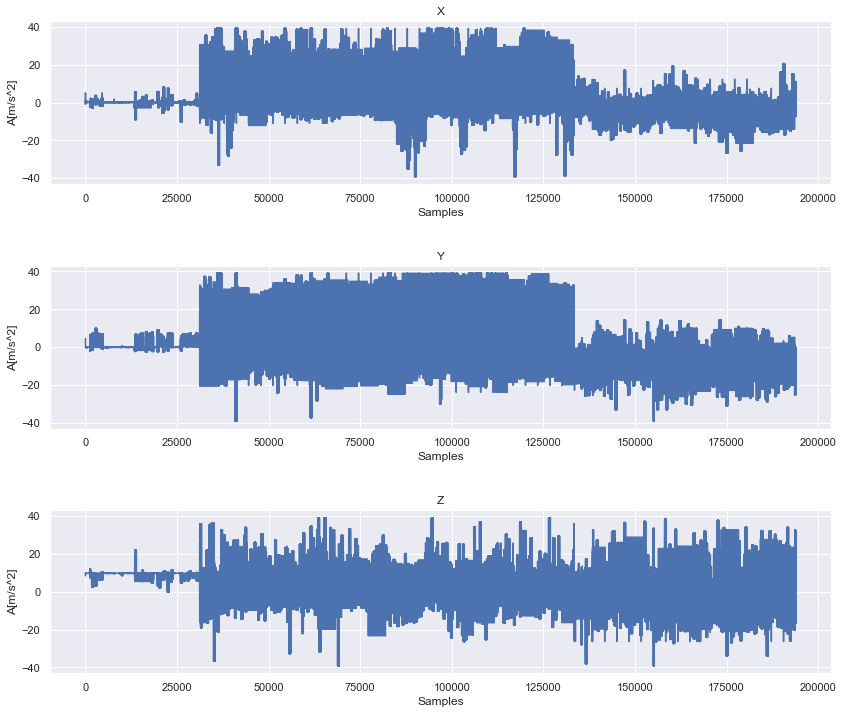

In [22]:
plot_xyz_output(x = dataframes_merged['accelerometer_X'], y = dataframes_merged['accelerometer_Y'], z = dataframes_merged['accelerometer_Z'], title_x='X', title_y= 'Y', title_z= 'Z')


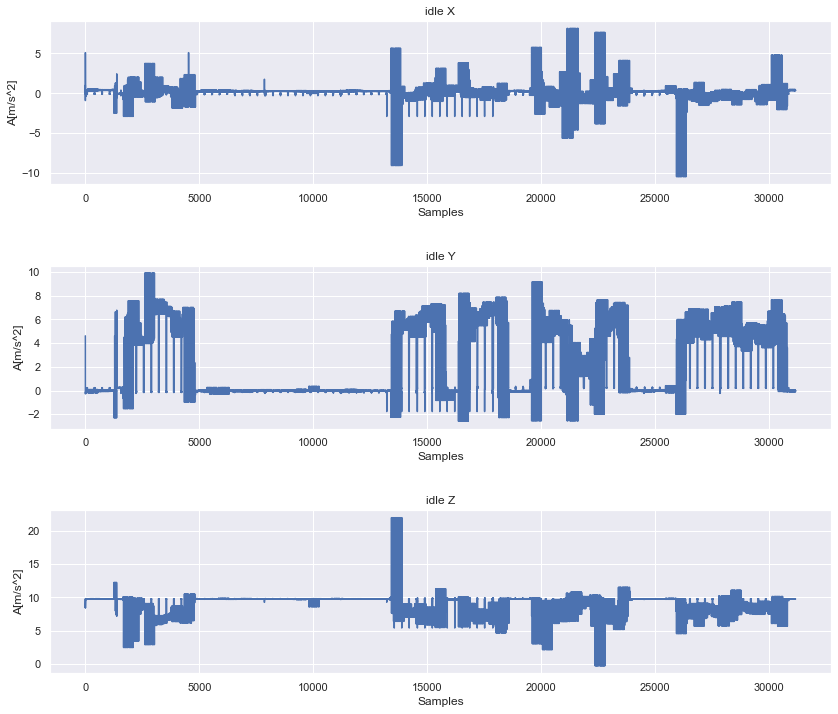

In [23]:
plot_xyz_output(x = df_idle_data['accelerometer_X'], y = df_idle_data['accelerometer_Y'], z = df_idle_data['accelerometer_Z'], title_x='idle X', title_y= 'idle Y', title_z= 'idle Z')

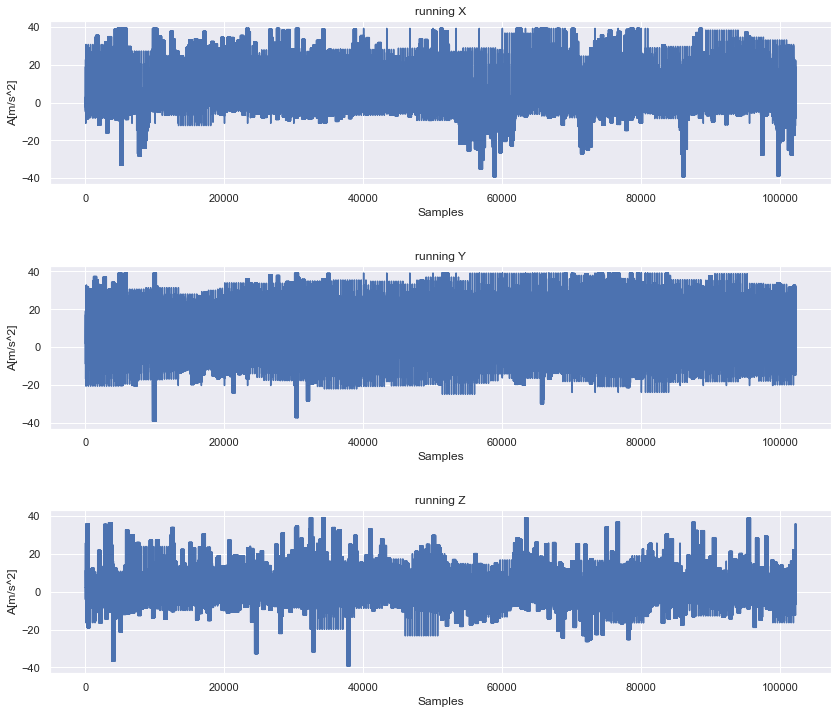

In [24]:
plot_xyz_output(x = df_running_data['accelerometer_X'], y = df_running_data['accelerometer_Y'], z = df_running_data['accelerometer_Z'], title_x='running X', title_y= 'running Y', title_z= 'running Z')

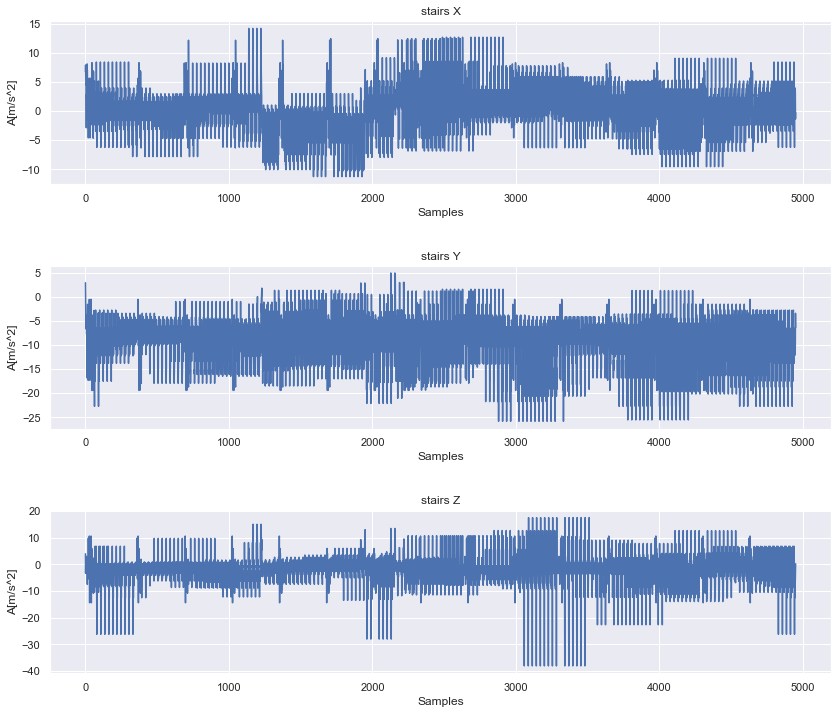

In [25]:
plot_xyz_output(x = df_stairs_data['accelerometer_X'], y = df_stairs_data['accelerometer_Y'], z = df_stairs_data['accelerometer_Z'], title_x='stairs X', title_y= 'stairs Y', title_z= 'stairs Z')

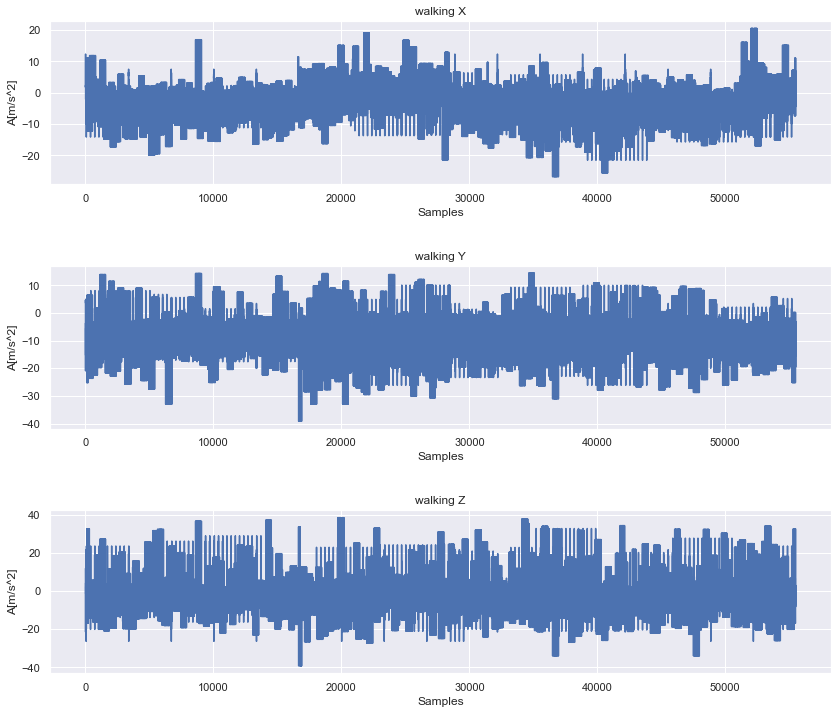

In [26]:
plot_xyz_output(x = df_walking_data['accelerometer_X'], y = df_walking_data['accelerometer_Y'], z = df_walking_data['accelerometer_Z'], title_x='walking X', title_y= 'walking Y', title_z= 'walking Z')

### visualize accelerometer data frequency of 1 random sample file

In [27]:
import random as rand
random_idle_file_index = rand.randint(0, df_idle_data['label'].value_counts().loc['idle'])
rand_idle_file = df_idle_data.iloc[random_idle_file_index].loc['filename']
rand_idle_file = df_idle_data[df_idle_data['filename'] == rand_idle_file]
rand_idle_file

,accelerometer_X,accelerometer_Y,accelerometer_Z,X_mean,Y_mean,Z_mean,X_stdev,Y_stdev,Z_stdev,label,filename
1920,-0.090980,0.282516,9.777920,0.208136,3.09698,8.162791,0.882951,2.951493,1.92204,idle,idle-120.csv
1921,0.023942,0.177171,9.701305,0.208136,3.09698,8.162791,0.882951,2.951493,1.92204,idle,idle-120.csv
1922,-0.095768,0.268151,9.730036,0.208136,3.09698,8.162791,0.882951,2.951493,1.92204,idle,idle-120.csv
1923,-0.076614,0.181959,9.749189,0.208136,3.09698,8.162791,0.882951,2.951493,1.92204,idle,idle-120.csv
1924,0.019154,0.220267,9.749189,0.208136,3.09698,8.162791,0.882951,2.951493,1.92204,idle,idle-120.csv
1925,-0.138864,0.215478,9.763555,0.208136,3.09698,8.162791,0.882951,2.951493,1.92204,idle,idle-120.csv
1926,-0.134075,0.177171,9.777920,0.208136,3.09698,8.162791,0.882951,2.951493,1.92204,idle,idle-120.csv
1927,-0.086191,0.215478,9.782708,0.208136,3.09698,8.162791,0.882951,2.951493,1.92204,idle,idle-120.csv
1928,-0.162806,0.268151,9.768343,0.208136,3.09698,8.162791,0.882951,2.951493,1.92204,idle,idle-120.csv
1929,-0.110133,0.186748,9.768343,0.208136,3.09698,8.162791,0.882951,2.951493,1.92204,idle,idle-120.csv


In [28]:
import random as rand

def get_random_file(dataframe, activity_type):
    # generate random index between 0 and the maximum value index of the dataframe
    random_file_index = rand.randint(0, dataframe['label'].value_counts().loc[activity_type])
    # get the filename behind the generated index
    rand_file = dataframe.iloc[random_file_index].loc['filename']
    # filter the dataframe by the defined filename and create a new dataframe
    df_rand_file = dataframe[dataframe['filename'] == rand_file]
    return df_rand_file

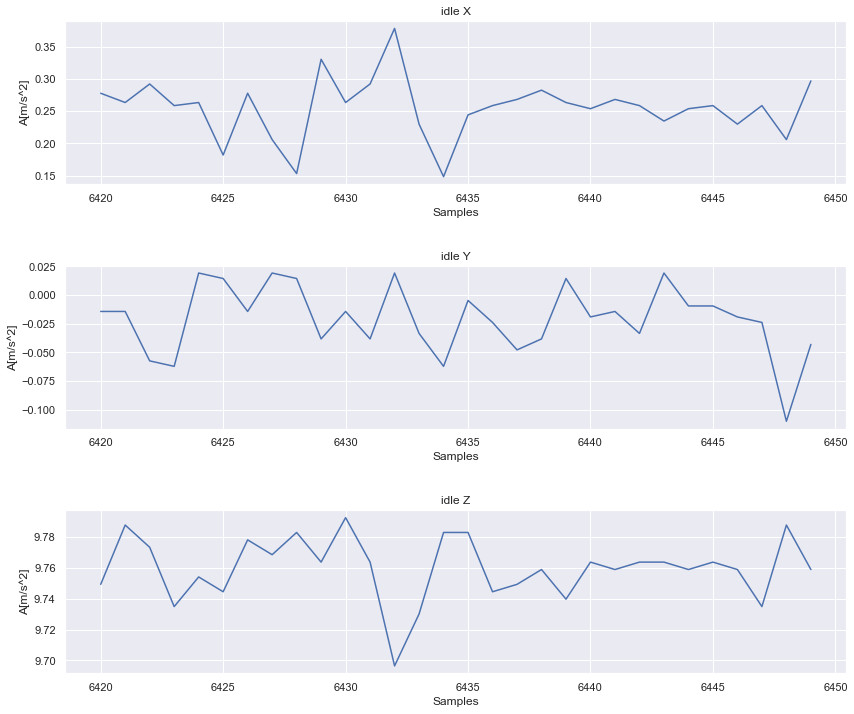

In [29]:
df_1_idle = get_random_file(df_idle_data, 'idle')
plot_xyz_output(x = df_1_idle['accelerometer_X'], y = df_1_idle['accelerometer_Y'], z = df_1_idle['accelerometer_Z'], title_x='idle X', title_y= 'idle Y', title_z= 'idle Z')

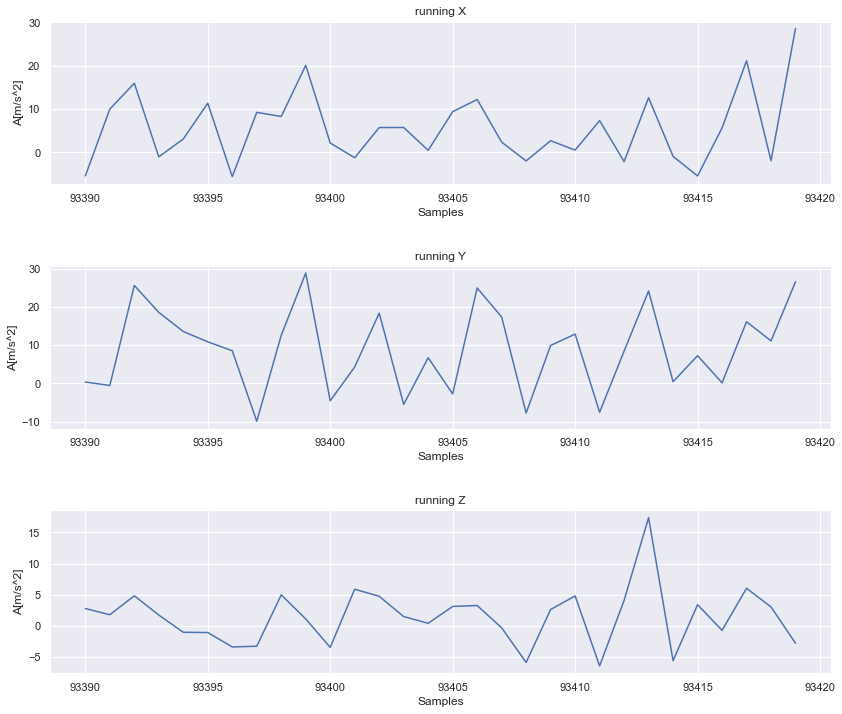

In [30]:
df_1_run = get_random_file(df_running_data, 'running')
plot_xyz_output(x = df_1_run['accelerometer_X'], y = df_1_run['accelerometer_Y'], z = df_1_run['accelerometer_Z'], title_x='running X', title_y= 'running Y', title_z= 'running Z')

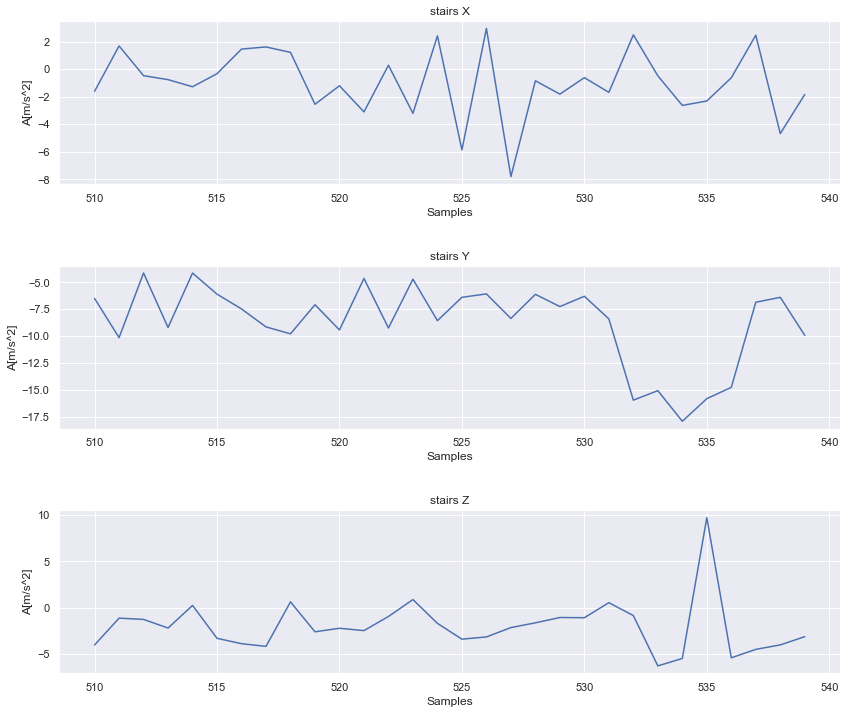

In [31]:
df_1_stair = get_random_file(df_stairs_data, 'stairs')
plot_xyz_output(x = df_1_stair['accelerometer_X'], y = df_1_stair['accelerometer_Y'], z = df_1_stair['accelerometer_Z'], title_x='stairs X', title_y= 'stairs Y', title_z= 'stairs Z')

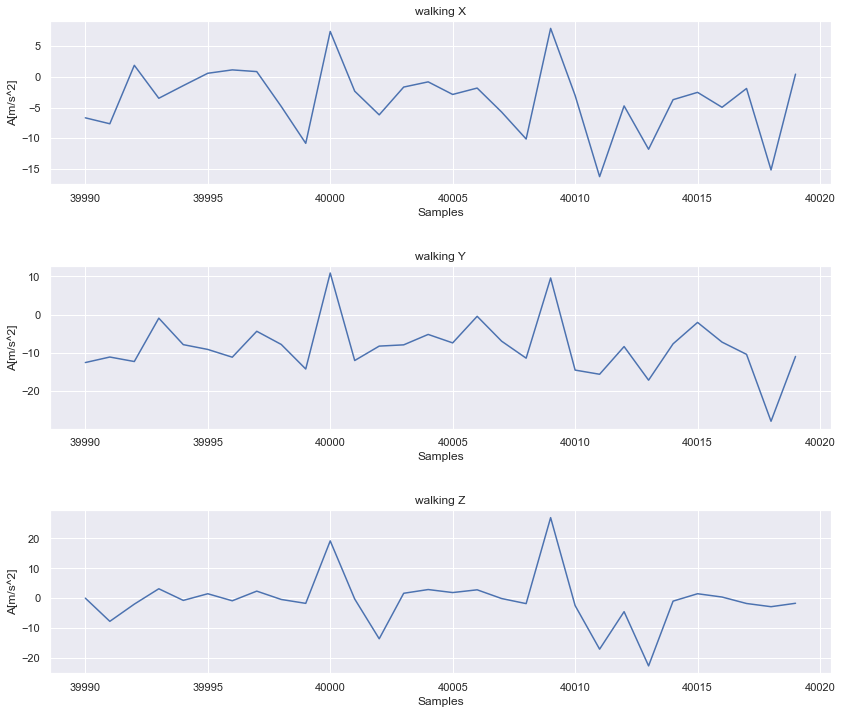

In [32]:
df_1_walk = get_random_file(df_walking_data, 'walking')
plot_xyz_output(x = df_1_walk['accelerometer_X'], y = df_1_walk['accelerometer_Y'], z = df_1_walk['accelerometer_Z'], title_x='walking X', title_y= 'walking Y', title_z= 'walking Z')

### Visualize signal spectrum of the entire dataset per activity type

#### visualize spectrum of accelerometer X idle activity type

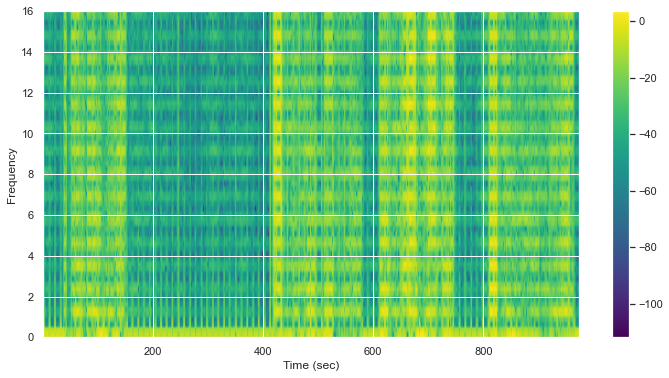

In [34]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_X'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

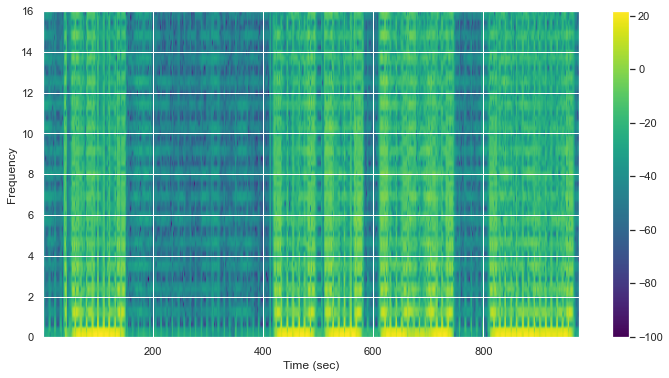

In [35]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_Y'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

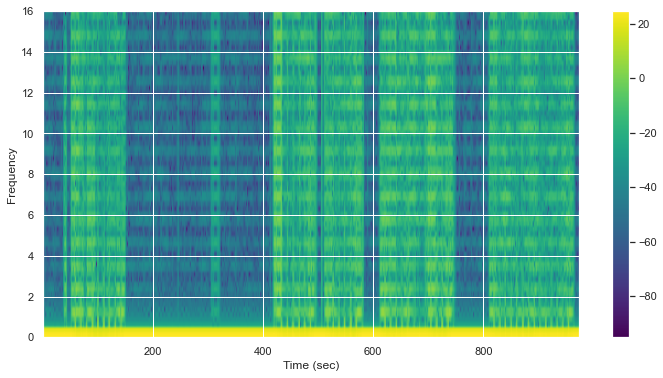

In [36]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_idle_data['accelerometer_Z'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

#### visualize spectrum of accelerometer X idle activity type for 1 random file

<ipython-input-37-7109f067aed9>:4: UserWarning: Only one segment is calculated since parameter NFFT (=128) >= signal length (=30).
  powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_1_idle['accelerometer_X'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')


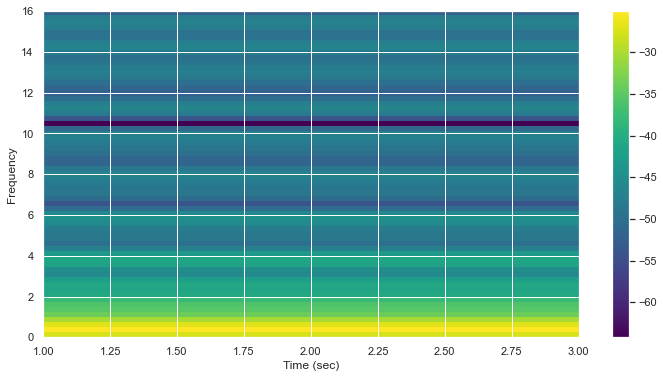

In [37]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_1_idle['accelerometer_X'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

### Visualize signal spectrum of the averages per activity type

#### Visualize signal spectrum of accelerometer X averages per idle activity type

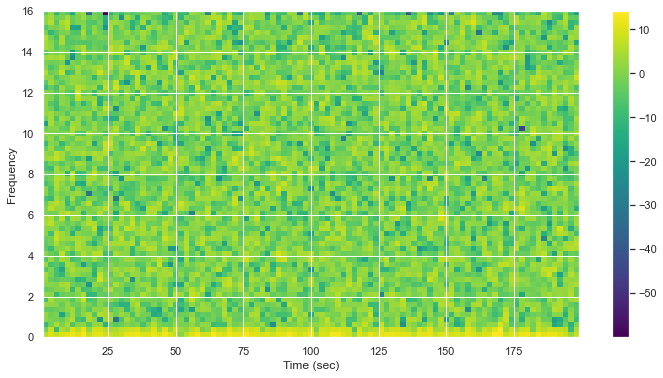

In [64]:
plt.subplots(1,1, figsize=(12,6))
NFFT = 128
noverlap = int(0.50 * NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(df_summary['X_mean'], Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

In [38]:
from scipy import fftpack
from numpy.fft import fft
def new_display_fft(signal, sampling_freq, title):
    # fig, axs = plt.subplots(3,1, figsize=(14,12))
    N = signal.shape[0]
    T = 1.0 / sampling_freq
    x = np.linspace(0, N*T, N)
    y = signal
    yf = fft(signal)
    f_s = sampling_freq
    yf = np.abs(yf) * 2.0 / N  # Normalize the wave
    #xf = np.linspace(0, 1 / (2.0*T), N)
    xf = fftpack.fftfreq(len(signal)) * f_s
    fig, ax = plt.subplots(figsize=(10,5))
    plt.title(title)
    ax.set_xlim(0, sampling_freq / 2)
    ax.plot(xf,yf)
    plt.show()

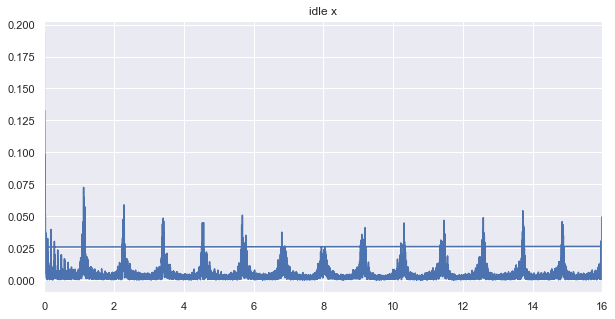

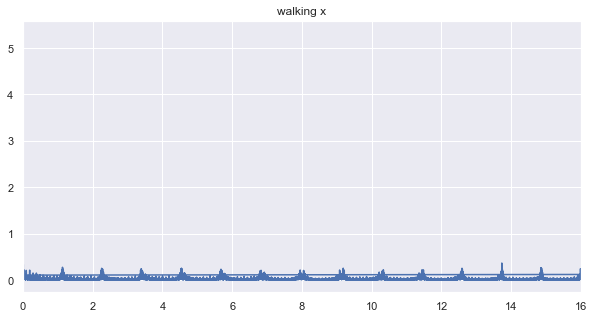

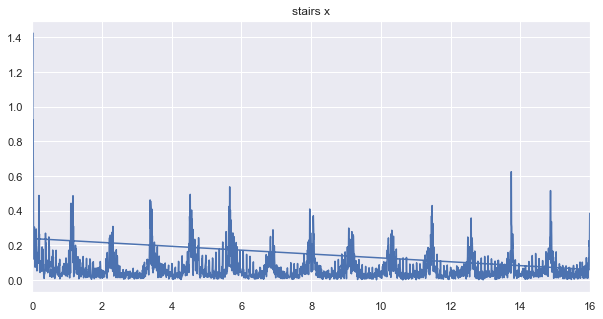

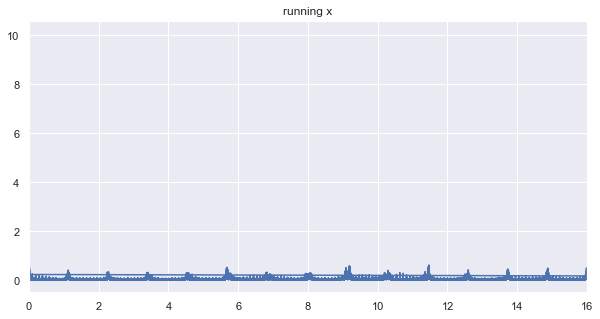

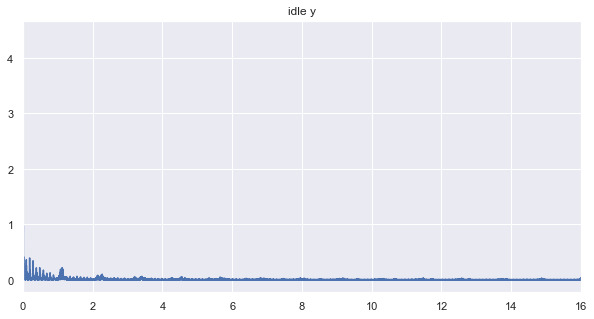

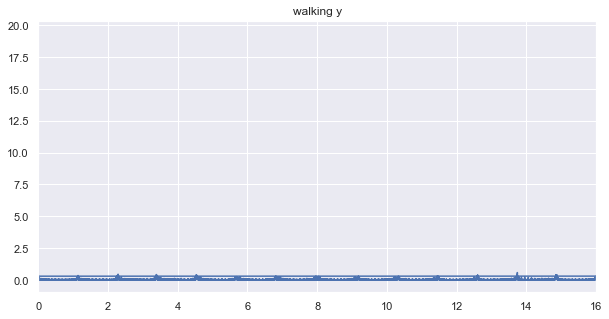

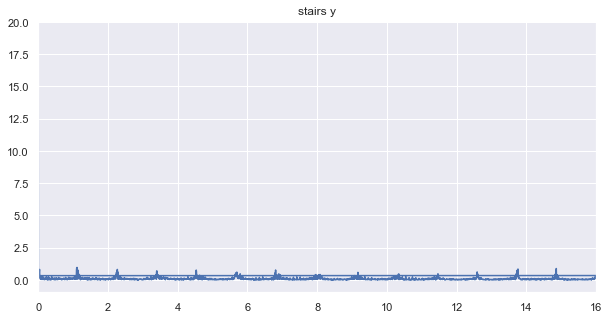

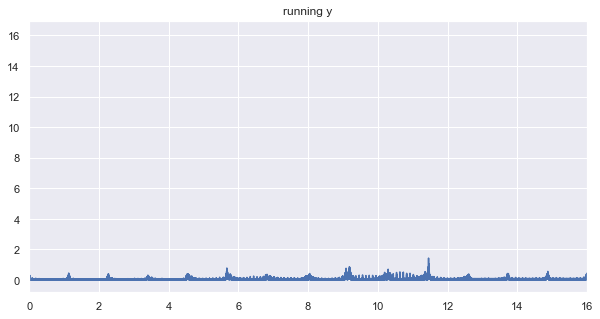

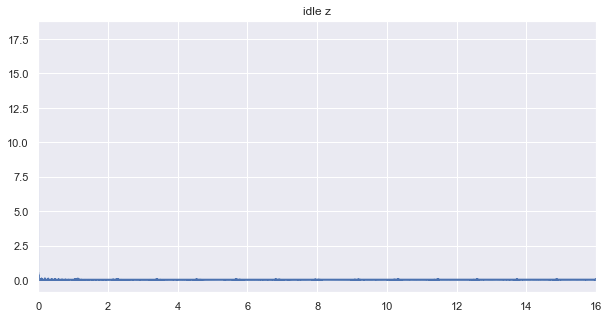

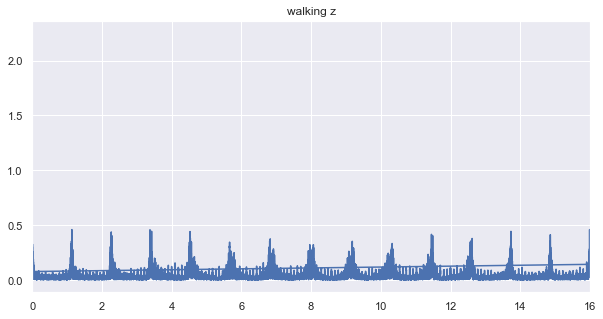

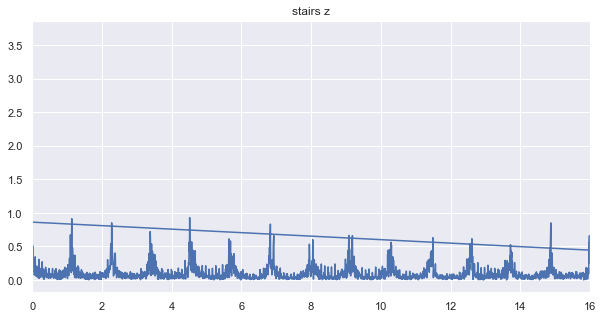

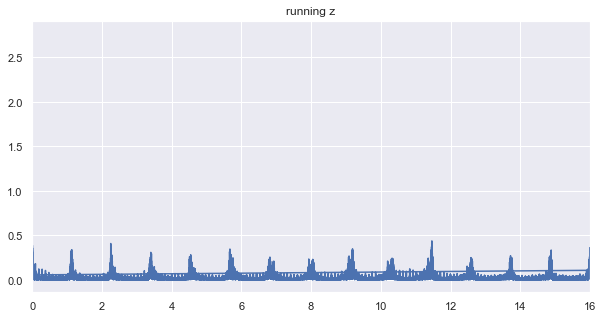

In [39]:
new_display_fft(df_idle_data["accelerometer_X"], 32.0, "idle x")
new_display_fft(df_walking_data["accelerometer_X"], 32.0, "walking x")
new_display_fft(df_stairs_data["accelerometer_X"], 32.0, "stairs x")
new_display_fft(df_running_data["accelerometer_X"], 32.0, "running x")
new_display_fft(df_idle_data["accelerometer_Y"], 32.0, "idle y")
new_display_fft(df_walking_data["accelerometer_Y"], 32.0, "walking y")
new_display_fft(df_stairs_data["accelerometer_Y"], 32.0, "stairs y")
new_display_fft(df_running_data["accelerometer_Y"], 32.0, "running y")
new_display_fft(df_idle_data["accelerometer_Z"], 32.0, "idle z")
new_display_fft(df_walking_data["accelerometer_Z"], 32.0, "walking z")
new_display_fft(df_stairs_data["accelerometer_Z"], 32.0, "stairs z")
new_display_fft(df_running_data["accelerometer_Z"], 32.0, "running z")


## Filter design

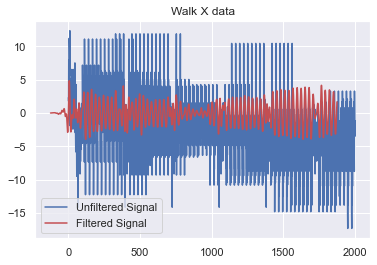

In [40]:
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
def bandpass_filter(signal, sample_rate, low_f, high_f, numt):

    # The cutoff frequency of the filter: 6KHz
    low_f = low_f / (sample_rate * 2)
    high_f = high_f / (sample_rate * 2)
    numtaps = numt
    delay = 0.5 * numtaps
    # Use firwin to create a lowpass FIR filter
    fir_coeff = firwin(numtaps, [low_f, high_f], pass_zero=False)
    # Use lfilter to filter the signal with the FIR filter
    filtered_signal = lfilter(fir_coeff, 1.0, signal)
    return filtered_signal, delay

newx, delay = bandpass_filter(df_walking_data['accelerometer_X'], 32.0, 2.0, 8.0, 250)

plt.plot(df_walking_data['accelerometer_X'][0:2000], label='Unfiltered Signal')
t = np.arange(len(df_walking_data['accelerometer_X'][0:2000]))
plt.plot((t-delay)[0:2000], newx[0:2000], '-r', label='Filtered Signal')
plt.title("Walk X data")
plt.legend()
plt.show()

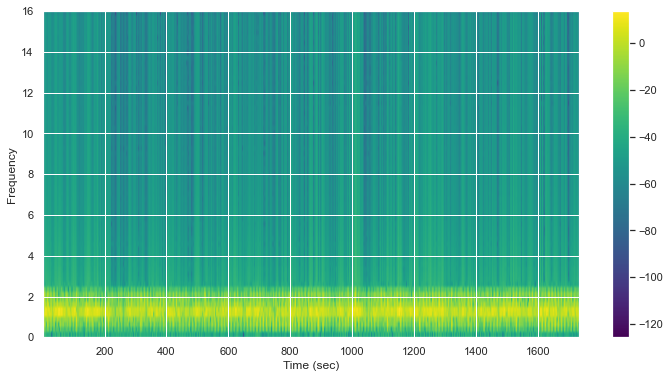

In [41]:
plt.subplots(1,1, figsize=(12,6))
NFFT=128
noverlap = int(0.50*NFFT)
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(newx, Fs=32, NFFT=NFFT, noverlap=noverlap, window=np.hamming(NFFT),cmap='viridis')
plt.xlabel('Time (sec)')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

### Collect the filtered data

In [42]:
def filter_data(df, sample_rate, low_f, high_f, numt):

    filtered_x, delay = bandpass_filter(df["accelerometer_X"], sample_rate, low_f, high_f, numt)
    filtered_y, delay = bandpass_filter(df["accelerometer_Y"], sample_rate, low_f, high_f, numt)
    filtered_z, delay = bandpass_filter(df["accelerometer_Z"], sample_rate, low_f, high_f, numt)

    filtered_data = np.stack((filtered_x, filtered_y, filtered_z), axis=-1)
    return  filtered_data

In [110]:
df_filtered = pd.DataFrame(columns=['X', 'Y', 'Z', 'label', 'filename'])

for ddd in dataframes:
    df_interim = pd.DataFrame(columns=['X', 'Y', 'Z', 'label', 'filename'])
    fd = filter_data(ddd, 32.0, 0.5, 8.0, 250)
    df_interim['X'] = fd[0:, 0]
    df_interim['Y'] = fd[0:, 1]
    df_interim['Z'] = fd[0:, 2]
    df_interim['label'] = ddd['label']
    df_interim['filename'] = ddd['filename']
    df_filtered = df_filtered.append(other=df_interim, ignore_index=True)

In [193]:
print(df_filtered[df_filtered['filename'] == 'idle-1.csv'].mean())
print(df_filtered[df_filtered['filename'] == 'idle-1.csv'].std())
print(dataframes_merged[dataframes_merged['filename'] == 'idle-1.csv'])

X   -0.000695
Y   -0.000879
Z   -0.016242
dtype: float64
X    0.001525
Y    0.002035
Z    0.012830
dtype: float64
    accelerometer_X  accelerometer_Y  accelerometer_Z    X_mean    Y_mean  \
0          1.000776         4.616021         8.576031  0.178448  0.167435   
1          0.718261         4.209007         8.446744  0.178448  0.167435   
2         -0.909797        -0.282516         9.203311  0.178448  0.167435   
3          5.099650         0.148441         8.418014  0.178448  0.167435   
4          1.762132        -0.162806         9.251195  0.178448  0.167435   
5         -0.086191        -0.148441         9.787497  0.178448  0.167435   
6         -0.062249        -0.191536         9.773131  0.178448  0.167435   
7         -0.057461        -0.114922         9.763555  0.178448  0.167435   
8         -0.124498        -0.162806         9.782708  0.178448  0.167435   
9         -0.138864        -0.124498         9.768343  0.178448  0.167435   
10        -0.095768        -0.129287   

In [170]:
columns_to_keep = ['X_mean', 'Y_mean', 'Z_mean', 'X_stdev', 'Y_stdev', 'Z_stdev']
df_filtered_mean = pd.DataFrame(columns= columns_to_keep)
#for group, frame in df_filtered.groupby('filename'):
 #   print(group)
 #   print(frame)
#    df_filtered_mean['X_mean'] = np.arange(frame['X'])
 #   df_filtered_mean['X_mean'] = frame['X'].mean()
 #   df_filtered_mean['Y_mean'] = np.average(frame['Y'])
 #   df_filtered_mean['Y_mean'] = frame['Y'].mean()
  #  df_filtered_mean['Z_mean'] = np.average(frame['Z'])
  #  df_filtered_mean['Z_mean'] = frame['Z'].mean()
  #  df_filtered['label'] = frame['label']
  #  df_filtered['filename'] = frame['filename']

# df_filtered_mean = df_filtered.groupby(['filename', 'label']).mean()
df_filtered_mean['X_mean'] = df_filtered.groupby(['filename', 'label'])['X'].mean()
df_filtered_mean['Y_mean'] = df_filtered.groupby(['filename', 'label'])['Y'].mean()
df_filtered_mean['Z_mean'] = df_filtered.groupby(['filename', 'label'])['Z'].mean()
df_filtered_mean['X_stdev'] = df_filtered.groupby(['filename', 'label'])['X'].std()
df_filtered_mean['Y_stdev'] = df_filtered.groupby(['filename', 'label'])['Y'].std()
df_filtered_mean['Z_stdev'] = df_filtered.groupby(['filename', 'label'])['Z'].std()
#df_filtered_mean = df_filtered_mean.reset_index(level=['label'])
df_filtered_mean.reset_index(inplace=True)

In [171]:
df_filtered_mean

,filename,label,X_mean,Y_mean,Z_mean,X_stdev,Y_stdev,Z_stdev
0,idle-1.csv,idle,-0.000695,-0.000879,-0.016242,0.001525,0.002035,0.012830
1,idle-10.csv,idle,-0.007522,-0.007816,-0.201473,0.007027,0.008977,0.114199
2,idle-100.csv,idle,-0.024102,-0.023577,-0.973557,0.021582,0.030180,0.378924
3,idle-1000.csv,idle,-0.047753,-0.043222,-2.682387,0.082423,0.128578,0.815265
4,idle-1001.csv,idle,0.191751,0.172975,3.421407,0.405552,0.491415,2.507608
...,...,...,...,...,...,...,...,...
6457,walking-995.csv,walking,0.053586,-2.389605,-0.374109,1.072082,0.597863,0.941001
6458,walking-996.csv,walking,-0.043221,-2.058688,-0.600561,0.836307,0.538792,0.899053
6459,walking-997.csv,walking,-0.198104,-1.845870,-0.417221,0.682359,0.609273,1.038128
6460,walking-998.csv,walking,-0.158029,-1.903670,0.514445,0.441218,0.615944,1.968149


## Modeling

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing

In [183]:
df_summary = df_summary.copy().sample(frac=1).reset_index(drop=True)
df_summary.head()

,X_mean,Y_mean,Z_mean,X_stdev,Y_stdev,Z_stdev,label,filename
0,6.741115,11.535104,1.792619,8.130393,12.183255,5.331323,running,running-624.csv
1,0.394565,-0.028092,9.742326,0.043862,0.037332,0.053717,idle,idle-990.csv
2,-0.960713,-8.315860,-1.175713,3.903222,4.636460,7.218531,walking,walking-953.csv
3,7.162494,8.774111,2.022462,9.280235,14.497998,5.944115,running,running-317.csv
4,0.396799,-0.026975,9.757808,0.052625,0.050607,0.024082,idle,idle-1003.csv


In [184]:
Y_prediction = df_summary['label']
X_data = df_summary.drop(columns=['filename', 'label'])

In [172]:
df_filtered_mean = df_filtered_mean.copy().sample(frac=1).reset_index(drop=True)
df_filtered_mean.head()


,filename,label,X_mean,Y_mean,Z_mean,X_stdev,Y_stdev,Z_stdev
0,running-1349.csv,running,0.979110,0.897662,1.018475,0.636578,0.434137,2.207495
1,walking-968.csv,walking,0.143901,-1.676518,-0.164024,1.009565,1.082632,0.707059
2,walking-737.csv,walking,-0.240073,-1.829728,0.157282,1.303168,1.891626,1.057947
3,running-2425.csv,running,0.195822,0.636073,-0.025662,1.356880,2.422179,0.987094
4,running-3352.csv,running,1.923108,0.888182,-1.014636,0.954812,2.467914,1.766981


In [194]:
Y_prediction = df_filtered_mean['label']
X_data = df_filtered_mean.drop(columns=['filename', 'label'])

In [185]:
print(X_data.shape)
print(Y_prediction.shape)

(6462, 6)
(6462,)


In [51]:
Y_le = preprocessing.LabelEncoder()
Y_le = Y_le.fit_transform(Y_prediction)

In [52]:
Y_le.shape

(6462,)

In [195]:
# splitting dataset for training and evaluations
Xtrain, Xtest, ytrain, ytest = train_test_split(X_data, Y_prediction, random_state = 42, shuffle= True)

In [187]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4846, 6)
(1616, 6)
(4846,)
(1616,)


## Modeling with SVC

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [188]:
model = SVC()

In [196]:
for i in tqdm(range(50), desc='Progress'):
    model.fit(Xtrain, ytrain)

Progress: 100%|██████████| 50/50 [00:11<00:00,  4.37it/s]


In [197]:
y_model = model.predict(Xtest)

In [198]:
print("Accuracy Score is {0}\nClassification report is below\n{1}".format(accuracy_score(ytest, y_model), classification_report(ytest, y_model)))

Accuracy Score is 0.9659653465346535
Classification report is below
              precision    recall  f1-score   support

        idle       0.98      1.00      0.99       295
     running       0.99      1.00      0.99       806
      stairs       0.00      0.00      0.00        44
     walking       0.92      0.99      0.95       471

    accuracy                           0.97      1616
   macro avg       0.72      0.74      0.73      1616
weighted avg       0.94      0.97      0.95      1616



d:\andriy\university\ucu\master\python\python_for_ds\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\andriy\university\ucu\master\python\python_for_ds\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\andriy\university\ucu\master\python\python_for_ds\venv\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

(<Figure size 504x720 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

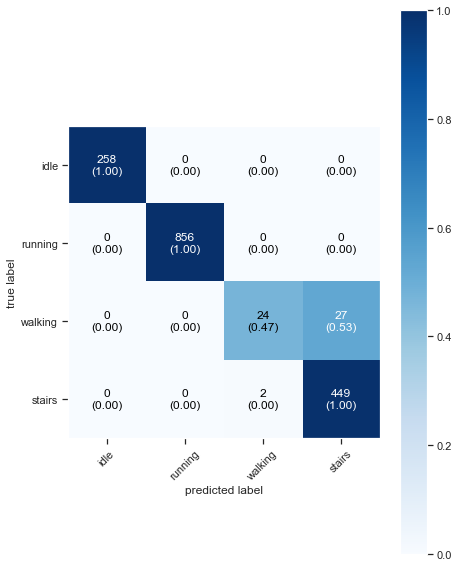

In [192]:
confusion = confusion_matrix(ytest, y_model)
plot_confusion_matrix(conf_mat=confusion, figsize=(7, 10), cmap="Blues", colorbar=True, class_names=activity_folders, show_normed=True)